<a href="https://colab.research.google.com/github/soumiyak/coderscave/blob/main/PHASE_2(GOLDEN_TASK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv("/content/emails.csv")

In [5]:
data.head()



,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
data['text']=data['text'].apply(word_tokenize)

In [10]:
data

,text,spam
0,"[Subject, :, naturally, irresistible, your, co...",1
1,"[Subject, :, the, stock, trading, gunslinger, ...",1
2,"[Subject, :, unbelievable, new, homes, made, e...",1
3,"[Subject, :, 4, color, printing, special, requ...",1
4,"[Subject, :, do, not, have, money, ,, get, sof...",1
...,...,...
5723,"[Subject, :, re, :, research, and, development...",0
5724,"[Subject, :, re, :, receipts, from, visit, jim...",0
5725,"[Subject, :, re, :, enron, case, study, update...",0
5726,"[Subject, :, re, :, interest, david, ,, please...",0


In [12]:
data['text']=data['text'].apply(lambda x: [item for item in x if item.isalpha()])

In [13]:
data['text']=data['text'].apply(lambda x: [item.lower() for item in x])

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
data['text']=data['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [16]:
data.head()

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, color, printing, special, request, a...",1
4,"[subject, money, get, software, cds, software,...",1


In [17]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
data['text']=data['text'].apply(lambda x: [ps.stem(item) for item in x ])

In [18]:
data

,text,spam
0,"[subject, natur, irresist, corpor, ident, lt, ...",1
1,"[subject, stock, trade, gunsling, fanni, merri...",1
2,"[subject, unbeliev, new, home, made, easi, im,...",1
3,"[subject, color, print, special, request, addi...",1
4,"[subject, money, get, softwar, cd, softwar, co...",1
...,...,...
5723,"[subject, research, develop, charg, gpg, forwa...",0
5724,"[subject, receipt, visit, jim, thank, invit, v...",0
5725,"[subject, enron, case, studi, updat, wow, day,...",0
5726,"[subject, interest, david, pleas, call, shirle...",0


In [19]:
data['text'] = data['text'].apply(lambda x: " ".join(x))

In [23]:
train_text = data.text[:3500]
test_text = data.text[3500:]
train_spam = data.spam[:3500]
test_spam = data.spam[3500:]

In [20]:
data.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject color print special request addit info...,1
4,subject money get softwar cd softwar compat gr...,1


In [21]:
cv = CountVectorizer(min_df=0, max_df=1, binary = False, ngram_range = (1,3))

In [24]:
cv_train_text = cv.fit_transform(train_text)
cv_test_text = cv.transform(test_text)

In [25]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_train_spam = lb.fit_transform(train_spam)
lb_test_spam = lb.fit_transform(test_spam)


In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_text, lb_train_spam)
mnb_bow_predict = mnb.predict(cv_test_text)
mnb_bow_score = accuracy_score(lb_test_spam, mnb_bow_predict)
print("Accuracy :", mnb_bow_score*100," %")

Accuracy : 97.44165170556553  %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


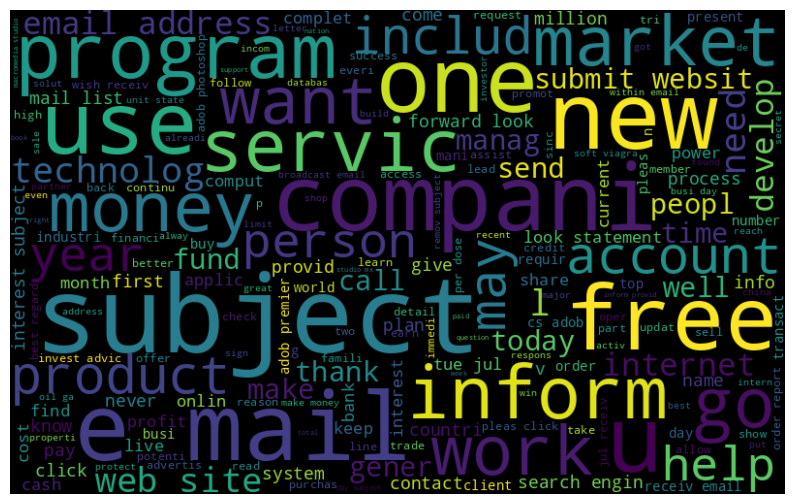

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the most used word in text
most_used_words = ' '.join(list(data[data['spam'] == 1]['text']))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(most_used_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()